In [ ]:
!pip install google-play-scraper requests nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd


# App ID (you can find this in the app's URL on the Play Store)
app_id = 'com.sadapay.app'  # Replace with the actual app ID

# Scrape reviews
try:
    result = reviews_all(
        app_id,
        sleep_milliseconds=50,  # You might want to adjust this to avoid getting blocked
        lang='en',
        country='us',
        sort=Sort.NEWEST
    )
    print(f"Successfully scraped reviews for app: {app_id}")
except Exception as e:
    print(f"Error scraping reviews: {e}")


Successfully scraped reviews for app: com.sadapay.app


In [ ]:
len(result)

32030

In [ ]:
result

[{'reviewId': '127ddabe-ae49-49df-9721-81206c07c2a0',
  'userName': 'A Google user',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Excellent',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '0.1.10762',
  'at': datetime.datetime(2024, 10, 3, 13, 57),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '0.1.10762'},
 {'reviewId': '79616c78-f9f1-47d1-8b8d-cde93adee1fd',
  'userName': 'A Google user',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Biz Account Not Show',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '0.1.10762',
  'at': datetime.datetime(2024, 10, 3, 13, 56, 52),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '0.1.10762'},
 {'reviewId': '46af9083-1200-4aab-b0d0-eb04d1dc6f18',
  'userName': 'A Google user',
  'u

In [ ]:
data_list = []
for i in result:
  print(i['content'])
  data_list.append(i['content'])

Streaming output truncated to the last 5000 lines.
Best sadapay app
Impressed by this app
Very Helpful and ontime reply. The staff is very impressive
Nice, very useful apk
Very nice response Good app
Such a Nice app ♥️🍁 Appreciate to Sada pay team and Thanks allot this is best app which we student are using
Well Done 👍 Great facilities providing us, I appreciated.
Good experience
Very good app
Great
One of the best transaction app easy to use i liked it 💓💜❤
It's a good app my experience with it so far is quite good. Signing up is so simple way better than Naya pay. debit card delivered in 4 days work perfectly for international transactions which is i like the most bc other local apps like jazz cash and easypaisa don't offer that. Withdrawal limit was disappointing like only 10k in one day tho it's not the app problem it's because of state bank of Pakistan orders. 3 free transactions in months thumbs up to sadapay 👍
Got my debit card today yeeee!!!
Great user experience.
I would love t

In [ ]:
import pandas as pd

df = pd.DataFrame(data_list,columns=["Reviews"] )
df.head()

Reviews
0  With the passage of time, I have observed Sada...
1                                           Nice app
2                                          Excellent
3                               Biz Account Not Show
4              Very Nice and Cool Aap I Am Impressed

In [ ]:
print(df.tail(20))

                                                 Reviews
32008     Easy to use and can do international payments.
32009  Awesome service, awesome chat support, super f...
32010  Too much Sada for now ( which isn't sada when ...
32011  Not a fan of banking apps in Pakistan but I mu...
32012  Been waiting for Account creation invite for a...
32013       Amazing App, best digital wallet of Pakistan
32014     Seamless onboarding and great user experience.
32015           Great UI. Account opens within minutes 😁
32016  Its been 2 years still no account activation. ...
32017                               It seems to be good.
32018                                                 🤫🥰
32019                                               Scam
32020                            Best financial services
32021                     Quick and seamless experience!
32022  Amazing custumer service and bestest payment a...
32023  I have been on waitlist for 2 years now, pathe...
32024             Can i pay to 

In [ ]:
# prompt: we need to clean our data from emoji, and remove all empty rows after the removal of emoji, remove (🤫🥰 ) these too

import re

def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

# Assuming you have your DataFrame 'df' with a column named 'Reviews'

df['Reviews'] = df['Reviews'].apply(lambda x: remove_emoji(x))
df['Reviews'] = df['Reviews'].str.replace(r'\(🤫🥰\)', '', regex=True)

# Remove rows where the 'Reviews' column is empty after cleaning
df = df[df['Reviews'].str.len() > 0]

print(df.tail(20))


                                                 Reviews
32010     Easy to use and can do international payments.
32011  Awesome service, awesome chat support, super f...
32012  Too much Sada for now ( which isn't sada when ...
32013  Not a fan of banking apps in Pakistan but I mu...
32014  Been waiting for Account creation invite for a...
32015       Amazing App, best digital wallet of Pakistan
32016     Seamless onboarding and great user experience.
32017            Great UI. Account opens within minutes 
32018  Its been 2 years still no account activation. ...
32019                               It seems to be good.
32020                                                 🤫🥰
32021                                               Scam
32022                            Best financial services
32023                     Quick and seamless experience!
32024  Amazing custumer service and bestest payment a...
32025  I have been on waitlist for 2 years now, pathe...
32026             Can i pay to 

In [ ]:
for i in df.Reviews:
  print(i)

Streaming output truncated to the last 5000 lines.
Best
That's what we need 
achi apps hai but ...
I will give 3 star only because I added 10 people in 2 days but still my card is not generated. 
One of the most useful app ! If we compare with other wallets app ! No doubt this wallet app Sada Pay is perfect
Very easy ooo good to use .I love this I received today and active now ..mind blowing so Amazing
Sadapay is a digital beauty account. I have done shopping easily on AliExpress from my friend's account through it. Now I have created my account. I have invited 12 people through my account but still waiting list. It is not right. I request the team to remove me from the waitlist and expedite it.
Well very sada to do payment.. loving it 
Nazish ni bat ni ki but baqi good hai
It is a great app . And also there service are very easy and there 24/7 help option is awesome and they reply and solve your problem inalmost 2 min after your question
Amazing app secure yet simple and easy to use
B

In [ ]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis",device = 0,  model=model_path, tokenizer=model_path)
sentiment_task("Covid cases are increasing fast!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT 

[{'label': 'negative', 'score': 0.7235766649246216}]

In [ ]:
sentiment_task("AI is great to work on")[0]['label']

'positive'

In [ ]:
label = []
try:
  for i in df.Reviews:
    print(i," --- " , sentiment_task(i)[0]['label'])
    label.append(sentiment_task(i)[0]['label'])

except Exception as e:
  print(e)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


With the passage of time, I have observed SadaPay Services, specially it's support service is not responsive, as well as users are facing difficulty in sending and receiving amount.  ---  negative
Nice app  ---  positive
Excellent  ---  positive
Biz Account Not Show  ---  neutral
Very Nice and Cool Aap I Am Impressed  ---  positive
Good and secure  ---  positive
Good  ---  positive
I am giving one star because my verification is pending and I am irritated with That  ---  negative
Best experience but need many more fintech features in it  ---  positive
2 3 days they take for small small transactions  ---  neutral
I have been using this app and found it awesome. Thanks team sadapay  ---  positive
Nice app  ---  positive
sadapay simple and easy wallet  ---  positive
Good  ---  positive
🤌  ---  positive
The amazing sadapay app!  ---  positive
Great   ---  positive
Very easy to use very fast app  ---  positive
zadardast  ---  neutral
Exilent Exilent  ---  neutral
Good  ---  positive
Loved i

In [ ]:
len(label)

1296

In [ ]:
#With GPU
len(label)

3043

In [ ]:
# prompt: shrink our df to 3043 row

df = df.iloc[:3043]


In [ ]:
df["label"]= label

<ipython-input-9-04c2712d811b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]= label


In [ ]:
df.head()

Reviews     label
0  With the passage of time, I have observed Sada...  negative
1                                           Nice app  positive
2                                          Excellent  positive
3                               Biz Account Not Show   neutral
4              Very Nice and Cool Aap I Am Impressed  positive

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

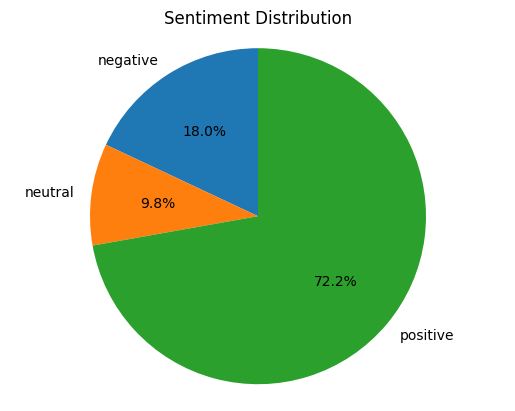

In [ ]:
# prompt: create a chart in % to show positve negitive and neutral

import matplotlib.pyplot as plt

# Calculate the percentage of each label
label_counts = df.groupby('label').size()
label_percentages = (label_counts / len(df)) * 100

# Create a pie chart
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()


# Tpoic Modeling Using Top2vec

In [ ]:
!pip install top2vec
!pip install top2vec[sentence_encoders]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.8 MB/s eta 0:00:00


In [ ]:
data = list(df.Reviews)

In [ ]:

from top2vec import Top2Vec

model = Top2Vec(documents=data, speed="fast-learn", workers=8)


2024-10-04 15:37:02,565 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-10-04 15:37:02,699 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2024-10-04 15:37:11,948 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-10-04 15:37:15,997 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-10-04 15:37:43,640 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-10-04 15:37:43,711 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

36

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_sizes

array([313, 216, 215, 196, 155, 144, 118, 113,  94,  92,  92,  86,  82,
        74,  70,  68,  67,  66,  66,  62,  60,  54,  53,  49,  47,  46,
        44,  43,  43,  39,  36,  33,  33,  25,  25,  24])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=5, num_docs=15)
for i in documents:
  print(i)
  print(" ")

Bhot hi fazool app hai isko install kr ke apna time naa waste kry mera account yaha 10 din sy verify ho raha hai lakwn abhi tk hua nahi
 
Worst... Pahly bhot achi thi yh app start ma har chez smooth. Abi 3,4 month sy hamesha transaction ma masla aa jata ha sent ho jaty agy pasy kbi 12 ganty bad jaty kbi 24 kbi 3 ganty etc Mai ny urgent kam k lye kisi ko bhjny thy or app sy sent ho gy or agy us ko abi tk gyi hi nai emergency abi hai to abi hi jany chiyea thy but app py na koi sai tareky sy help ka tareka hai na kch bots chat krty bs.. Yh meri last transaction ho gi Sada pay k sath Ghatiya tareen hai.. Qk kam k waqt jo kam nai ai
 
Bhot e kharb service hai ik tara ka fraud e hai slow reply milta hai or koi b problem ho jy to koi solution nhi dety or sab sy main bt ap in ka office visit nhi kr skty to hum pagal Hain jis bank ma payment deposit kr rhy us ka office e nhi visit kr skty To jo sadapay use krty hain kindly just transaction krn fund's save nh krn wrna issue bn skta hai baki ap k

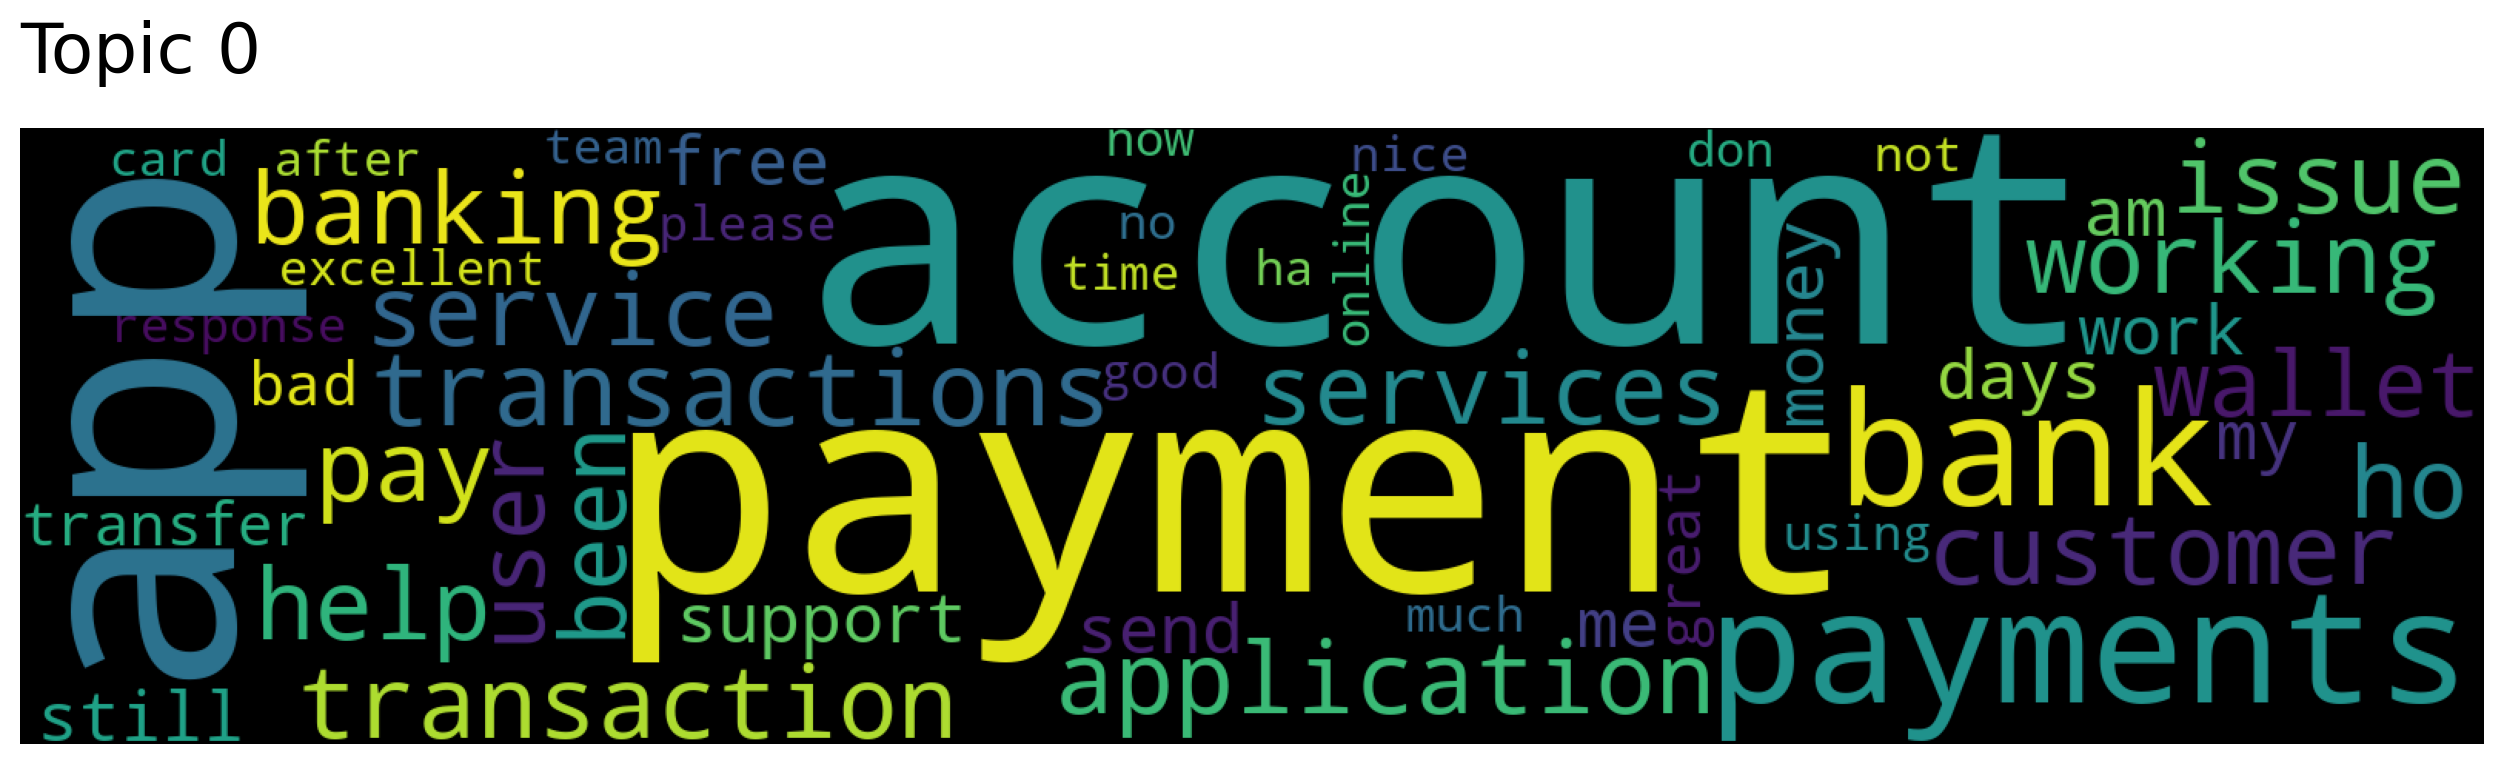

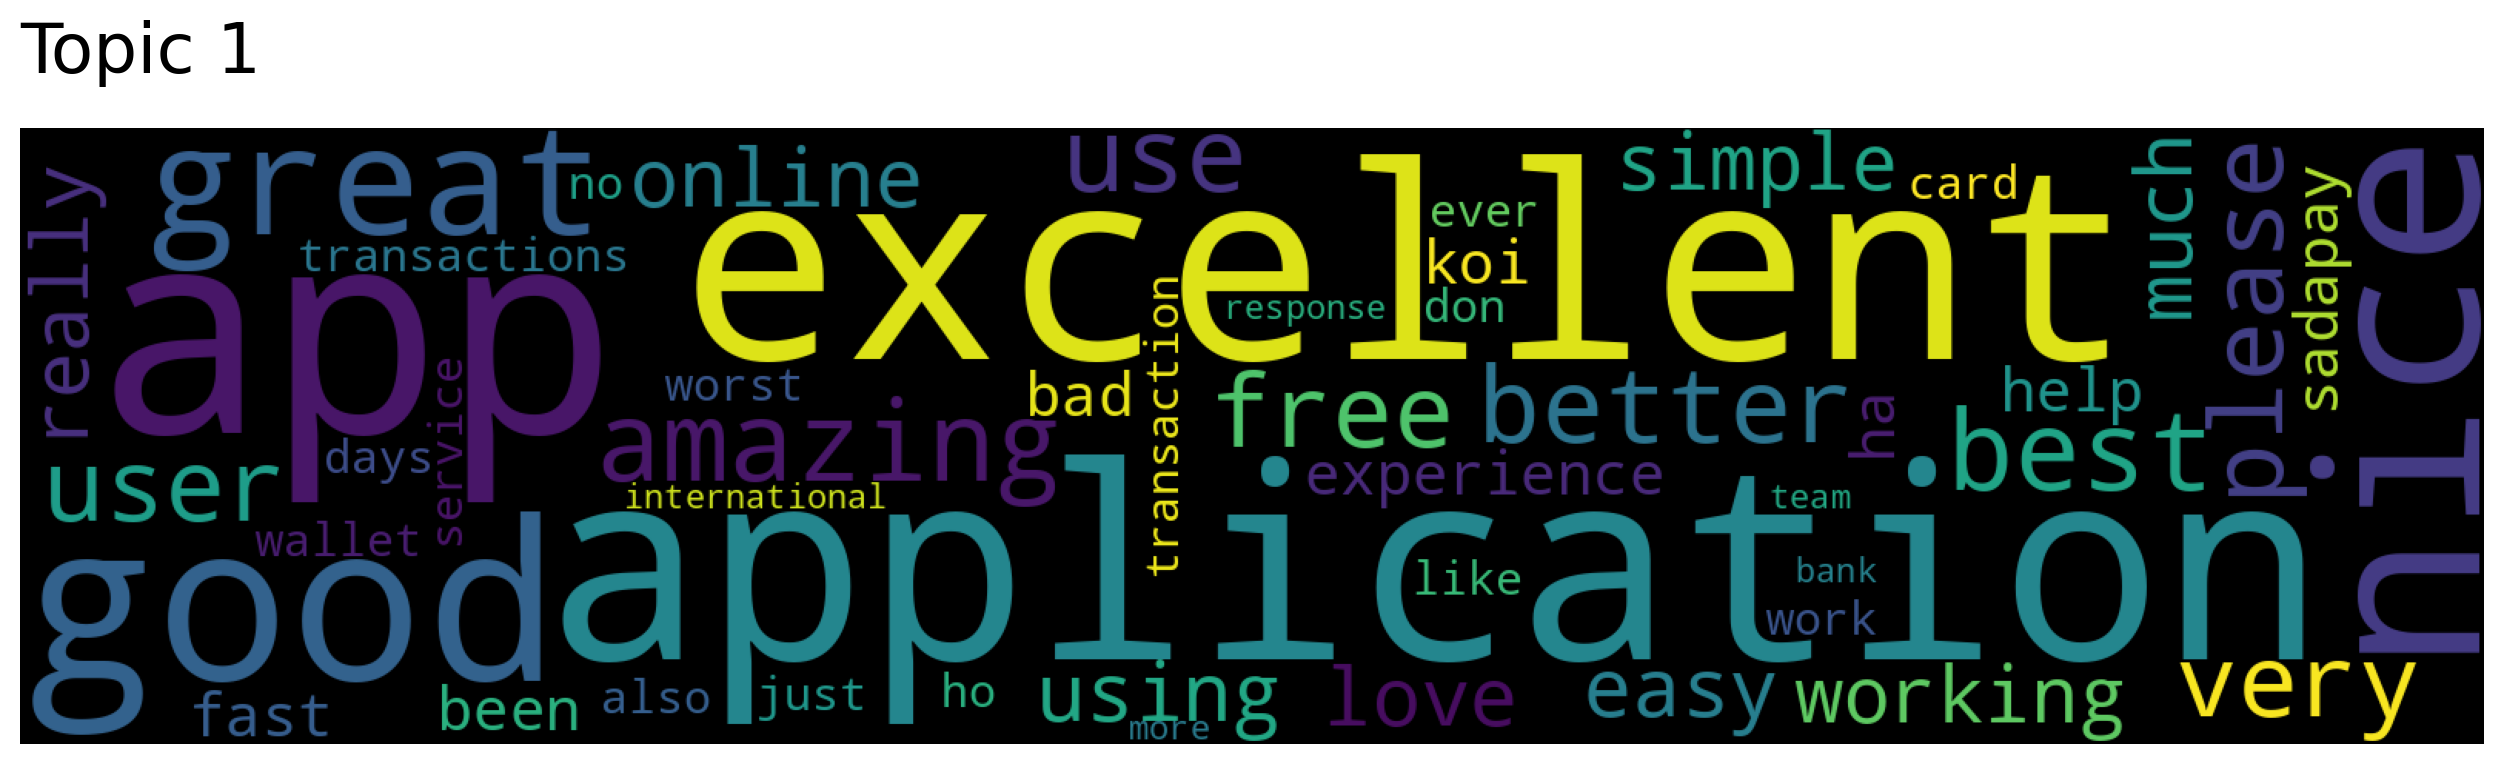

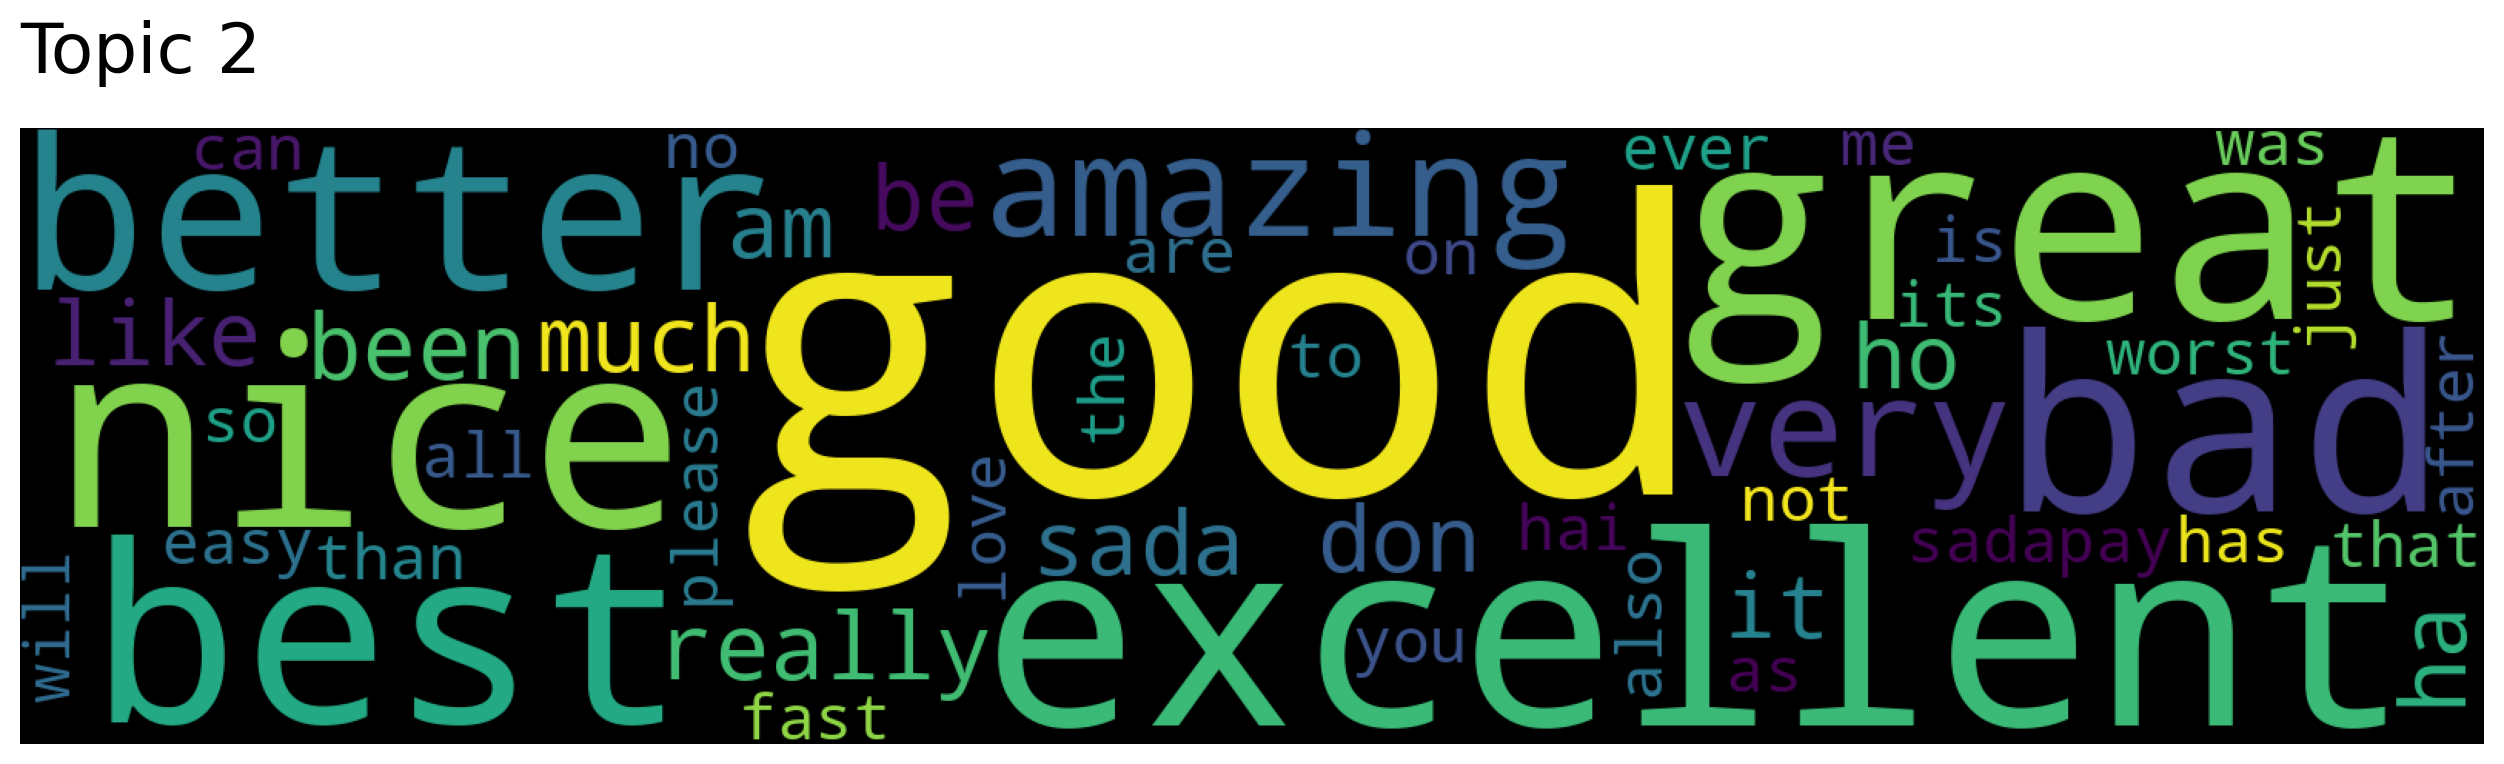

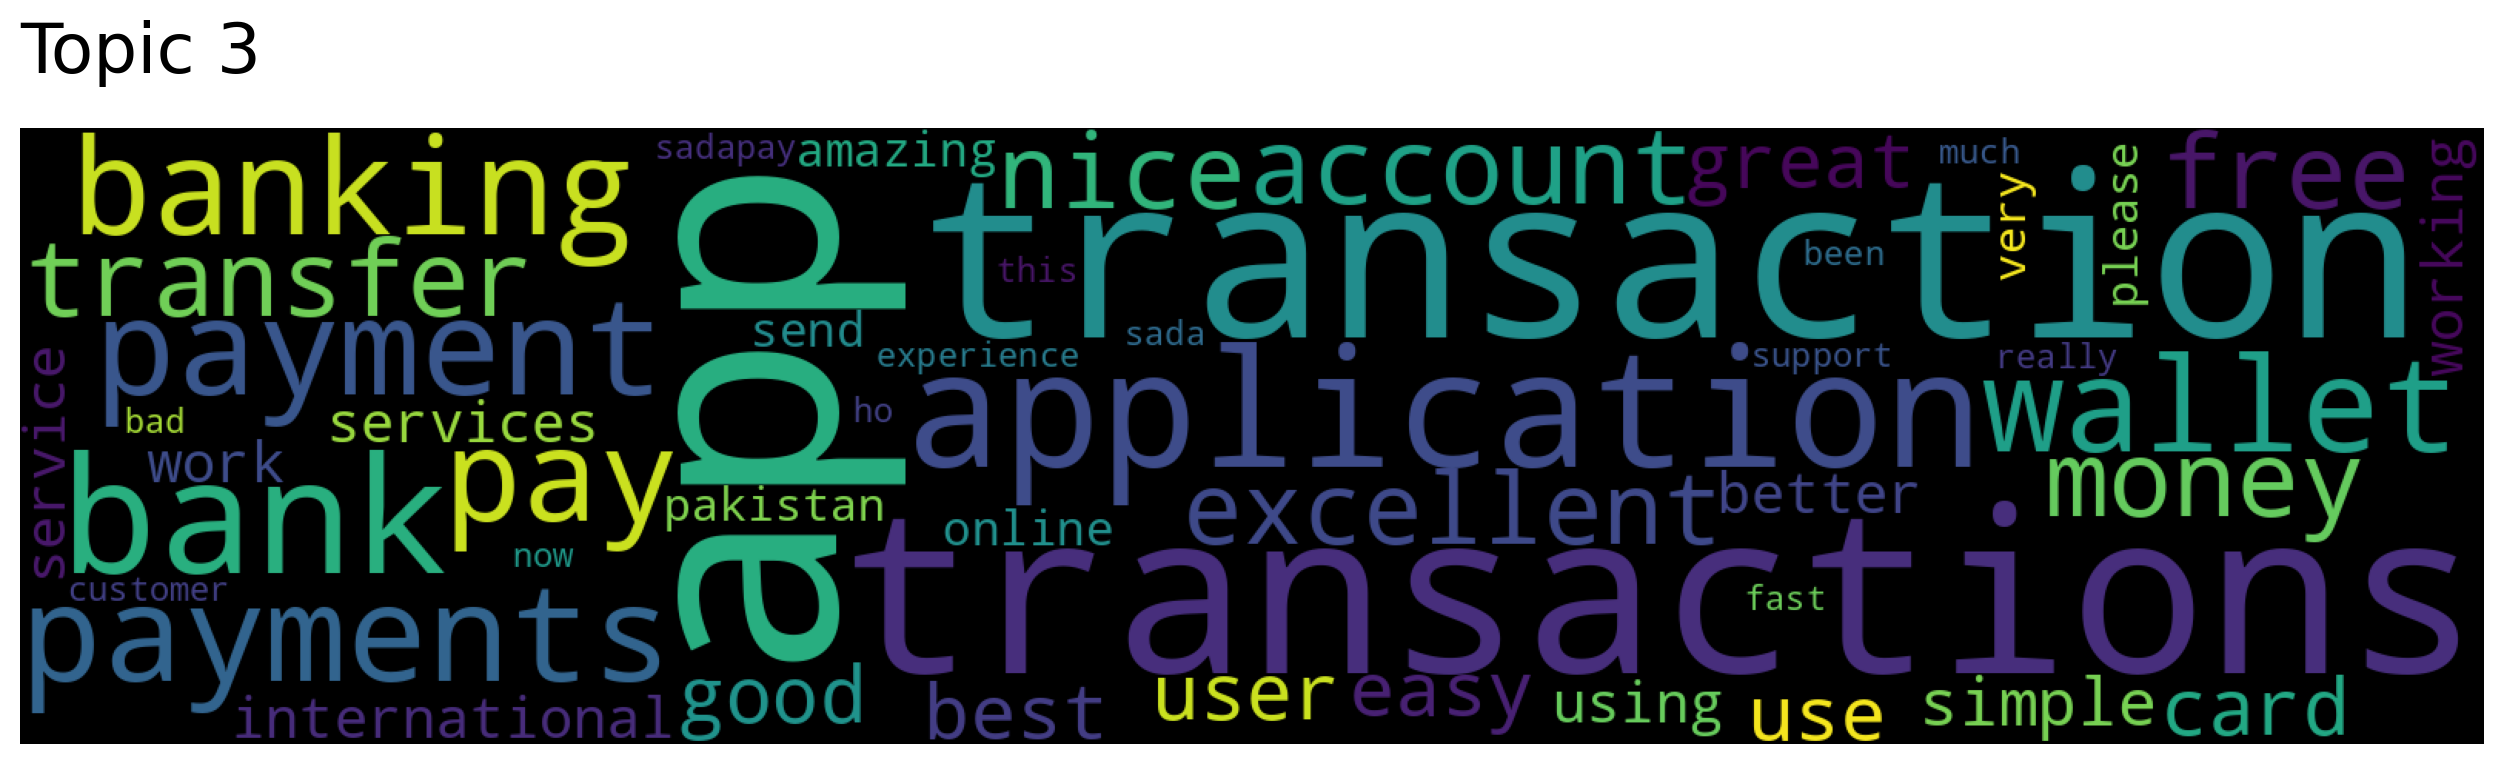

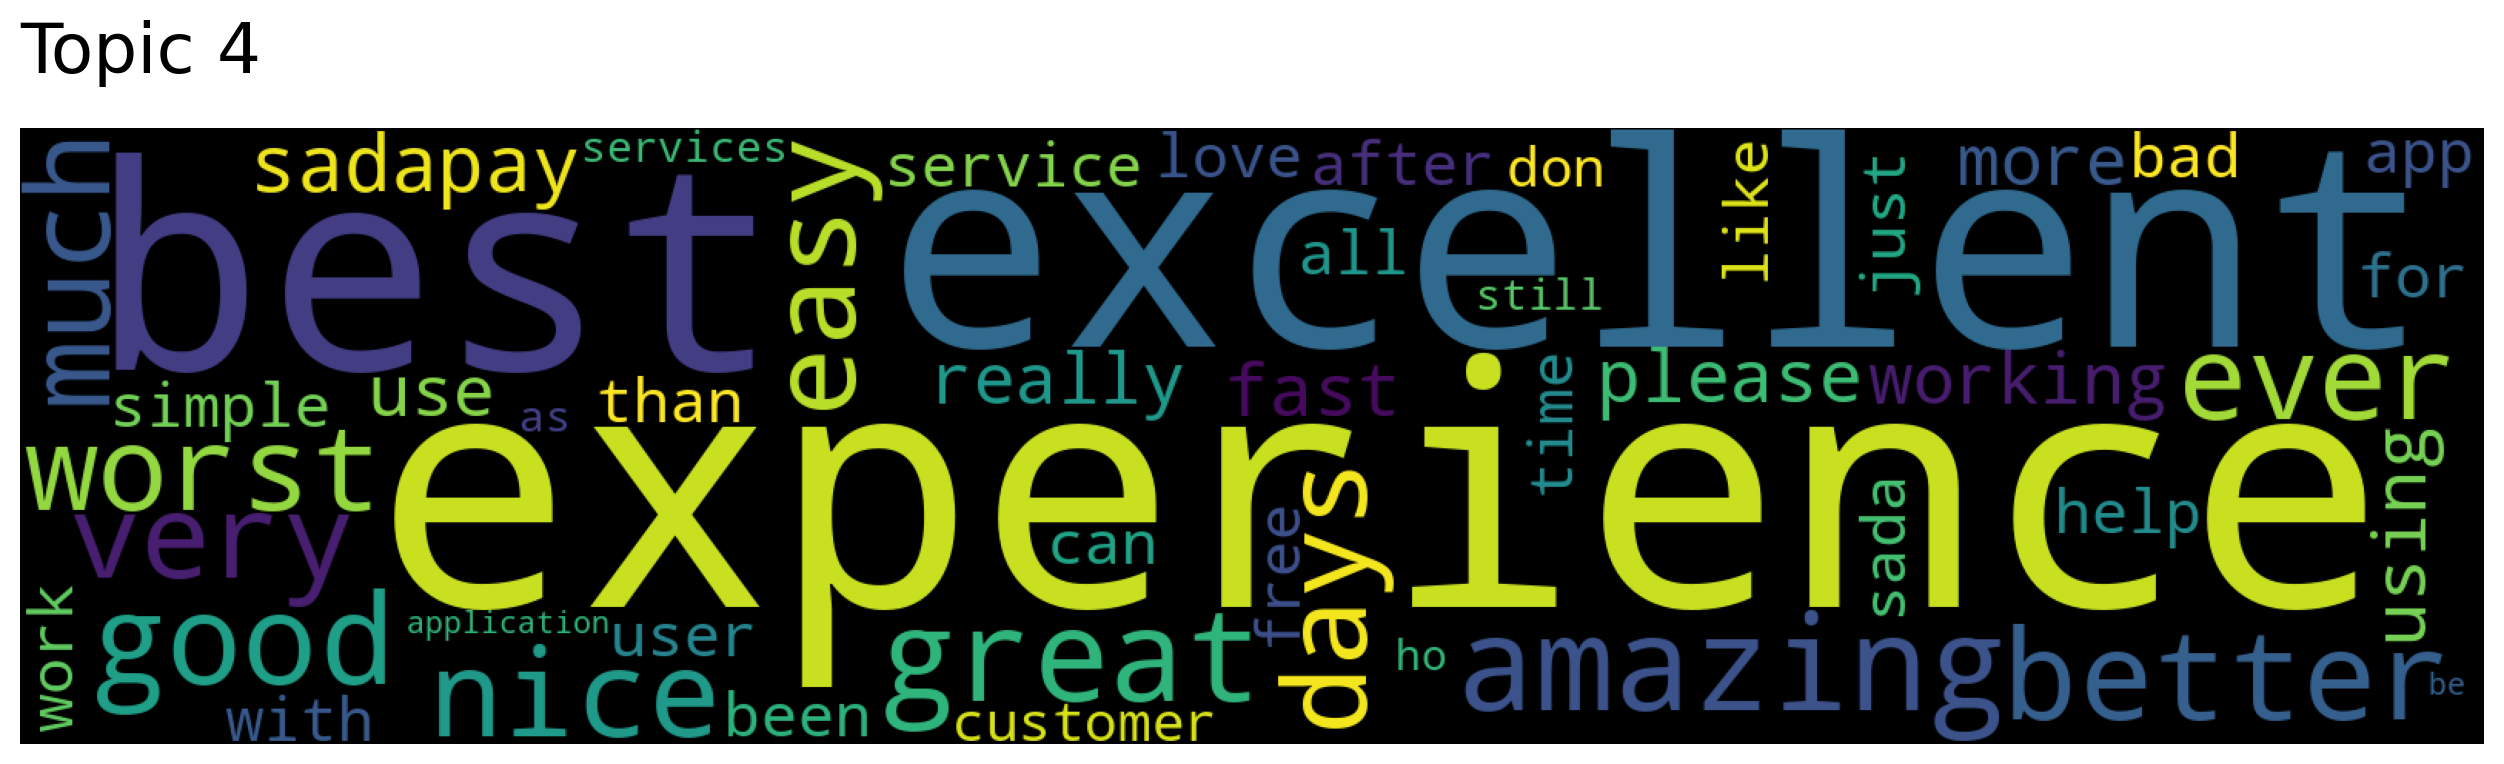

In [ ]:
for i in range(5):
  model.generate_topic_wordcloud(i)

# Gradio UI for App sentiment and topic modeling

In [ ]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd

def scrape_reviews(app_id):
  # App ID (you can find this in the app's URL on the Play Store)
  #app_id = 'com.sadapay.app'  # Replace with the actual app ID
  result = []
  # Scrape reviews
  try:
      result = reviews_all(
          app_id,
          sleep_milliseconds=50,  # You might want to adjust this to avoid getting blocked
          lang='en',
          country='us',
          sort=Sort.NEWEST
      )
      print(f"Successfully scraped reviews for app: {app_id}")
  except Exception as e:
      print(f"Error scraping reviews: {e}")

  data_list = []
  for i in result:
    #print(i['content'])
    data_list.append(i['content'])

  return data_list


#Funtio to remove Emoji
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  emoji_pattern.sub(r'', text)

# Assuming you have your DataFrame 'df' with a column named 'Reviews'
df = pd.DataFrame(data_list,columns=["Reviews"] )
df['Reviews'] = df['Reviews'].apply(lambda x: remove_emoji(x))
df['Reviews'] = df['Reviews'].str.replace(r'\(🤫🥰\)', '', regex=True)

# Remove rows where the 'Reviews' column is empty after cleaning
df = df[df['Reviews'].str.len() > 0]

print(df.tail(20))

In [ ]:
# prompt: create a gradio UI that allows user to input text and return the sentiment graph of the app user provided

!pip install gradio

import gradio as gr

def analyze_sentiment(text):
  """Analyzes the sentiment of the input text using the sentiment_task pipeline."""
  try:
    sentiment = sentiment_task(text)[0]['label']
    return sentiment
  except Exception as e:
    return f"Error analyzing sentiment: {e}"


iface = gr.Interface(
    fn=analyze_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter your text here..."),
    outputs=gr.Label(label="Sentiment"),
    title="Sentiment Analysis",
    description="Analyze the sentiment of your text using a pre-trained model.",
)

iface.launch()
